In [1]:
%matplotlib notebook

In [76]:
import numpy as np
import matplotlib as mpl
import matplotlib.pyplot as plt
from scipy.optimize import curve_fit, minimize
import random

# 拟合多个形状相同但高度不同的轮廓

In [133]:
def multiple_profile(x, ys, f):
    def fun(a):
        # 参数数组a，其前几个表示每个轮廓的强度，后面剩余的参数用于共同的轮廓
        ny = len(ys)
        s_individual = a[:ny]
        return sum([sum((ys[i] - s_individual[i] * f(x, *a[ny:]))**2)
                    for i in range(ny)])
    return fun

def f_prof(x, p):
    # 高斯轮廓
    return np.exp(-p * x**2)

def fitting_bootstrap(x, ys, f, ntrial=50):
    # 通过bootstrap方法获得拟合参数的分布
    fitted_params = []
    for i in range(ntrial):
        y_s_fitting = random.choices(ys, k=len(ys))
        res = minimize(multiple_profile(x, y_s_fitting, f),
                       [1]*len(ys) + [5.0])
        fitted_params.append(res.x[-1])
    return fitted_params

<IPython.core.display.Javascript object>


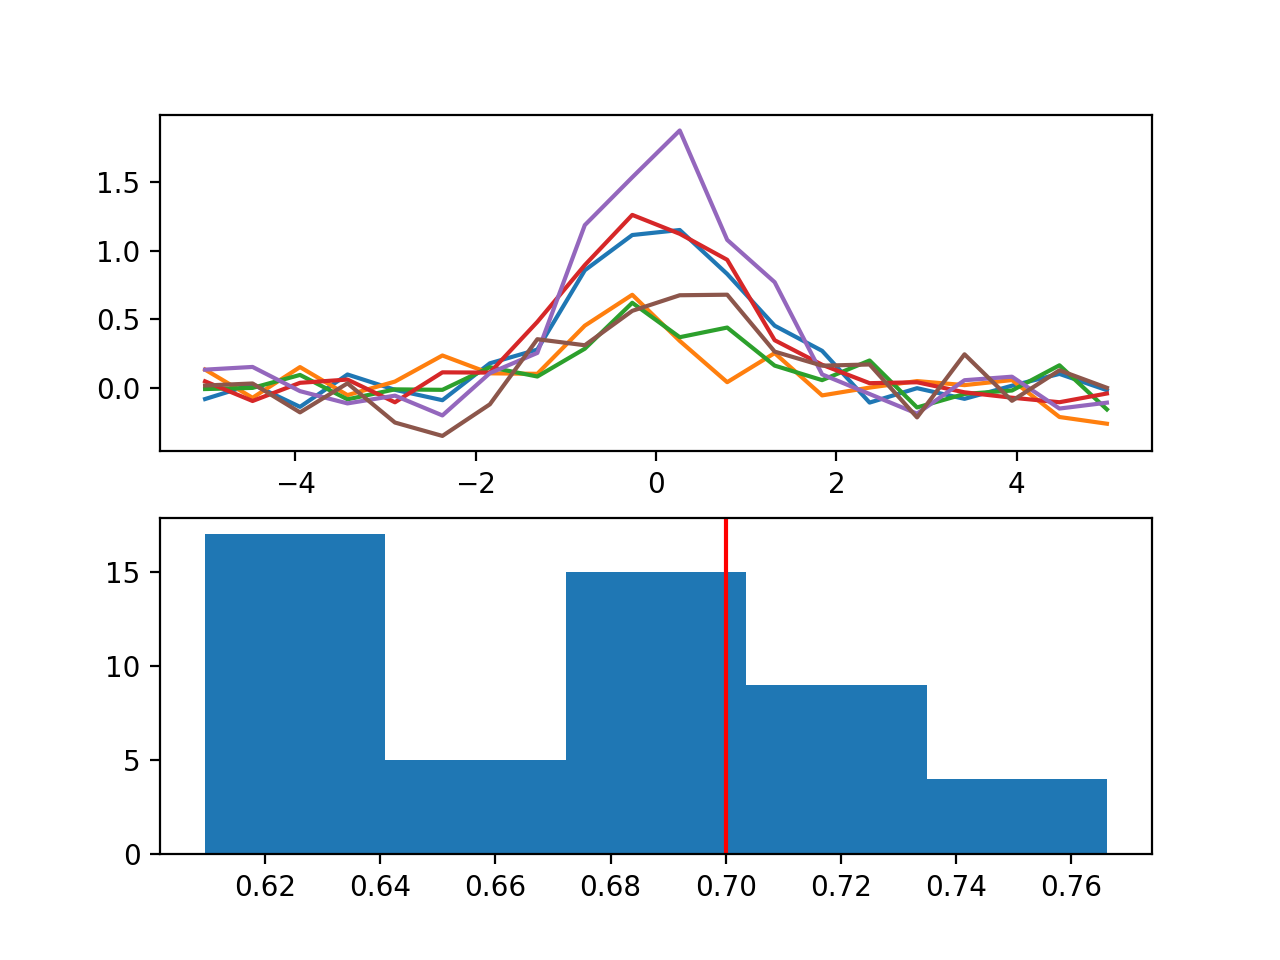

[1.17451487 0.52043696 0.5993193  1.25743394 1.61804658 0.64077339] 0.7


In [146]:
n_in_prof = 20
nsample = 6
prof_param = 0.7
ntrial = 50

noise_scale = 0.2
y_scale_min, y_scale_max = 0.5, 2.0

noise_scales = np.random.rand(nsample) * noise_scale
y_scales = np.random.uniform(low=y_scale_min, high=y_scale_max, size=nsample)

# 生成多个带有噪声的、高度不同的假轮廓
x = np.linspace(-5,5, num=n_in_prof)
prof = f_prof(x, prof_param)
y_s = [prof * y_scales[i] +
       np.random.randn(n_in_prof) * noise_scales[i] for i in range(nsample)]

fig = plt.figure()
ax = fig.add_subplot(2,1,1)
for y in y_s:
    ax.plot(x,y)

print(y_scales, prof_param)

fitted_params = fitting_bootstrap(x, y_s, f_prof, ntrial)

ax = fig.add_subplot(2,1,2)
ax.hist(fitted_params, bins=5)
ax.axvline(x=prof_param, color='red')

<IPython.core.display.Javascript object>


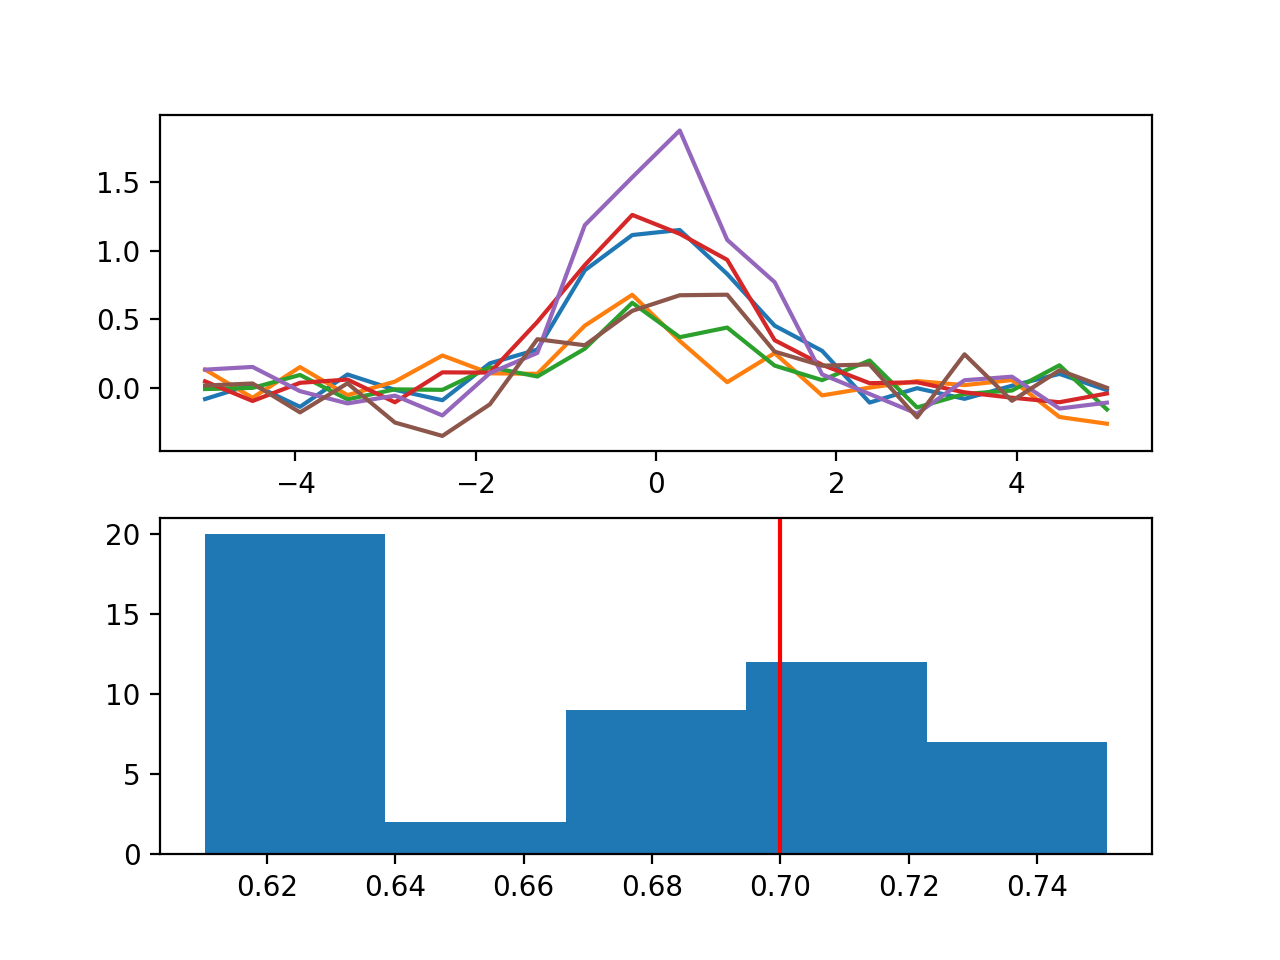

In [147]:
fitted_params = fitting_bootstrap(x, y_s, f_prof, ntrial)

fig = plt.figure()
ax = fig.add_subplot(2,1,1)
for y in y_s:
    ax.plot(x,y)

ax = fig.add_subplot(2,1,2)
ax.hist(fitted_params, bins=5)
ax.axvline(x=prof_param, color='red')